# UTSA CS 4973/5483: Assignment-2

Spring 2021

**Tran - Richard - (peh215)**

## Learning Objectives

*   Feature Detection
*   Feature Description
*   Feature Matching
*   Applications - Panorama, Tracking, Augmented Reality


In [12]:
# Add your imports here
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Add code for drive mounting and base path here
dir_list = sorted([item for item in os.listdir('.')])
imgs_panorama_l = [item for item in dir_list if item.endswith('-l.jpg')]
imgs_panorama_r = [item for item in dir_list if item.endswith('-r.jpg')]
imgs_cover = [item for item in dir_list if item.endswith('cover.jpg')]
vids = [item for item in dir_list if item.endswith('.mp4')]


# Panorama Stitching (70 points)

Write code to create a panorama when provided with 2 images (left and right). You will be given 3 such image pairs and you need to create 3 panoramas. You can either create a function which just needs as input the left and right image filenames OR you can copy-paste the code three times to show the results.

Following is the rough algorithm of how to solve this problem:

*   Read the left and right images and plot them side by side
*   Initialize the Feature Detector (ORB or any other you find)
*   Initialize the Feature Matcher (BFMatcher or FLANN or any other you find)
*   Convert the two images to grayscale
*   Detect and compute features for the left and right images
*   Draw the keypoints on the original rgb left and right images - plot them
*   Find the feature matches (perform sorting or ratio test, if needed)
*   Draw the matches between the two images on the original rgb images and plot that combined image with the matches
*   Update the keypoint lists to align them based on matches found
*   Find the homography matrix between the keypoints to transform image-2 in the perspective of image-1
*   Create a new image with width equal to the sum of the individual widths of image-1 and image-2
*   Warp the image-2 in the perspective of image-1 - plot them
*   Paste the original image-1 back on the above image
*   Plot the final panorama result

Following are the final results that are needed for each of the 3 image pairs

*   Original left and right RGB images
*   Features drawn on the original left and right RGB images
*   Feature matching image where lines are drawn between the left and right images
*   Warped image-2 in the perspective of image-1
*   Final panorama result


AttributeError: ignored

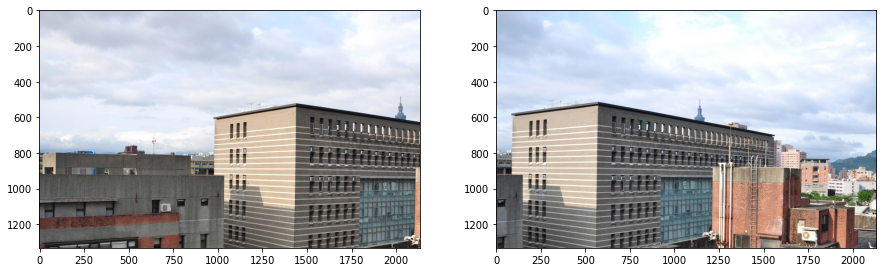

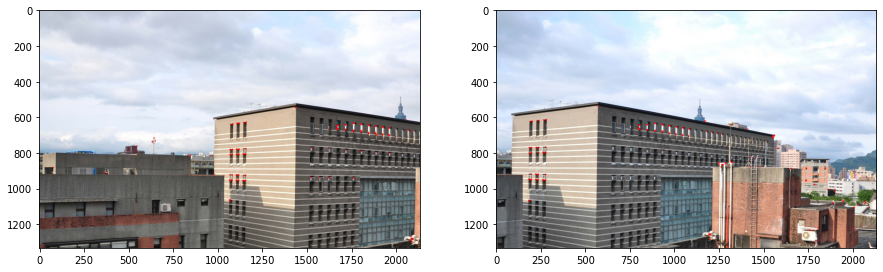

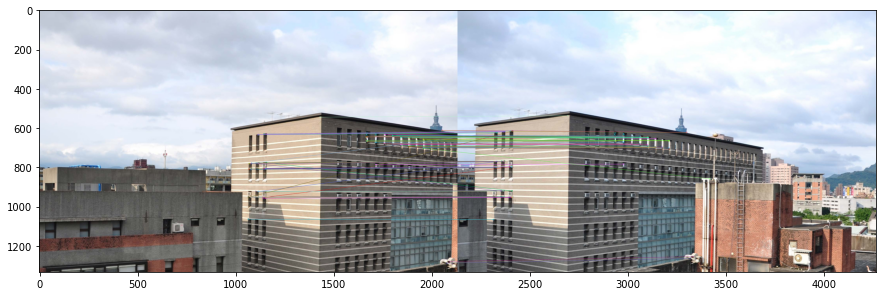

In [14]:
def left_right_plot(l, r):
    fig, axs = plt.subplots(1, 2, figsize=(15,15))
    axs[0].imshow(l)
    axs[1].imshow(r)

def panorama(img_l, img_r):
    # Read the left and right images and plot them side by side
    img_l = cv2.imread(img_l)
    img_r = cv2.imread(img_r)
    img_left = cv2.cvtColor(img_l, cv2.COLOR_BGR2RGB)
    img_right = cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB)
    left_right_plot(img_left, img_right)

    # Initialize the Feature Detector (ORB or any other you find)
    orb = cv2.ORB_create()

    # Initialize the Feature Matcher (BFMatcher or FLANN or any other you find)
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)

    flann = cv2.FlannBasedMatcher(index_params,search_params)
    
    # Convert the two images to grayscale
    img_l_gray = cv2.cvtColor(img_left, cv2.COLOR_RGB2GRAY)
    img_r_gray = cv2.cvtColor(img_right, cv2.COLOR_RGB2GRAY)

    # # Detect and compute features for the left and right images
    kp_l = orb.detect(img_l_gray, None)
    kp_r = orb.detect(img_r_gray, None)
    kp_l, des_l = orb.compute(img_l_gray, kp_l)
    kp_r, des_r = orb.compute(img_r_gray, kp_r)

    # Draw the keypoints on the original rgb left and right images - plot them
    img_l_key = cv2.drawKeypoints(img_left, kp_l, None, color=(255,0,0), flags=0)
    img_r_key = cv2.drawKeypoints(img_right, kp_r, None, color=(255,0,0), flags=0)
    left_right_plot(img_l_key, img_r_key)

    # Find the feature matches (perform sorting or ratio test, if needed)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des_l, des_r, k=2)
    
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
    
    # Draw the matches between the two images on the original rgb images and plot that combined image with the matches
    img_matches = cv2.drawMatchesKnn(img_left, kp_l, img_right, kp_r, good, None, flags=2)
    plt.figure(figsize=(15,15))
    plt.imshow(img_matches)

    # Update the keypoint lists to align them based on matches found
    src_pts = np.float32([ kp_l[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp_r[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    # Find the homography matrix between the keypoints to transform image-2 in the perspective of image-1
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img_left.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img_right = cv2.polylines(img_right,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    plt.figure(figsize=(15,15))
    plt.imshow(img_right)

    # Create a new image with width equal to the sum of the individual widths of image-1 and image-2

    # Warp the image-2 in the perspective of image-1 - plot them

    # Paste the original image-1 back on the above image

    # Plot the final panorama result

    pass

for left, right in zip(imgs_panorama_l, imgs_panorama_r):
    panorama(left, right)
    break


# Augmented Reality

## Detect & Track object (30 points)

Find a "template" object in the video which can vary in position, rotation, and scale. Draw a bounding box around the object and keep on tracking that object.

Following is the rough algorithm of how to solve this problem:

*   Read the "template" image that is supposed to be tracked
*   Initialize the Feature Detector (ORB or any other you find)
*   Initialize the Feature Matcher (BFMatcher or FLANN or any other you find)
*   Detect and compute features for the "template" image
*   Create a video capture source for the input mp4 video
*   Create a video writer for the output mp4 video
*   Read the input video frame by frame
    - Detect and compute features for the image frame
    - Find the feature matches between the features of the video image frame and that of the "template" image (perform sorting or ratio test, if needed)
    - Update the keypoint lists to align them based on matches found
    - Find the homography matrix between the keypoints to transform the "template" image in the perspective of the video image frame
    - Create a copy of the video image frame
    - Take a vector of the 4 "template" image corners
    - Do a perspective transform of the vector to get the rectangle corner in the video image frame
    - Draw lines using the 4 transformed corners to get the new video image frame
    - Write this new image frame to the output video writer
*   Close the input and out video sources


## Replace object in video with new object "image" (10 points)

Find a "template" object in the video which can vary in position, rotation, and scale. Replace that object throughout the video with a new "replacement" object, which can be different in shape than the original "template" image.

Following is the rough algorithm of how to solve this problem:

*   Read the "template" image that is supposed to be tracked
*   Initialize the Feature Detector (ORB or any other you find)
*   Initialize the Feature Matcher (BFMatcher or FLANN or any other you find)
*   Detect and compute features for the "template" image
*   Create a video capture source for the input mp4 video
*   Create a video writer for the output mp4 video
*   Read the "replacement" image that is supposed to be in the resultant video
*   Resize the "replacement" image to match the shape of the "template" image
*   Read the input video frame by frame
    - Detect and compute features for the image frame
    - Find the feature matches between the features of the video image frame and that of the "template" image (perform sorting or ratio test, if needed)
    - Update the keypoint lists to align them based on matches found
    - Find the homography matrix between the keypoints to transform the "template" image in the perspective of the video image frame
    - Create a copy of the video image frame
    - Use the homography matrix to warp the "replacement" image in the perspective of the video image frame
    - Copy the "transformed replacement" image on to the video image frame copy
    - Write this new image frame to the output video writer
*   Close the input and output video sources


## Replace object in video with new object "video" (15 points)

Find a "template" object in the video which can vary in position, rotation, and scale. Replace that object throughout the video with a new "replacement-video", which can be different in shape than the original "template" image.

Following is the rough algorithm of how to solve this problem:

*   Read the "template" image that is supposed to be tracked
*   Initialize the Feature Detector (ORB or any other you find)
*   Initialize the Feature Matcher (BFMatcher or FLANN or any other you find)
*   Detect and compute features for the "template" image
*   Create a video capture source for the input mp4 video
*   Create a video writer for the output mp4 video
*   Create a video capture source for the input "replacement-video" mp4 video
*   Resize the "replacement" image to match the shape of the "template" image
*   Read both the input videos in parallel frame by frame
    - Detect and compute features for the original video image frame
    - Find the feature matches between the features of the original video image frame and that of the "template" image (perform sorting or ratio test, if needed)
    - Update the keypoint lists to align them based on matches found
    - Find the homography matrix between the keypoints to transform the "template" image in the perspective of the video image frame
    - Create a copy of the original video image frame
    - Extract the center portion of the "replacement video". The height should remain the same, but you need to crop the corresponding columns from the center so that the aspect ratio matches that of the "template" image
    - Resize the "extracted replacement video" image frame to match the size of the "template" image
    - Use the homography matrix to warp the "resized extracted replacement video" image in the perspective of the video image frame
    - Copy the "transformed replacement video" image on to the original video image frame copy
    - Write this new image frame to the output video writer
*   Close the input and output video sources

# Submission Instructions



1.   Complete all tasks above
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard
4.   Submit the 3 output videos for the Augmented Reality part


## Rubric

*   (70 points) Panorama Stitching
*   (30 points) Detect & Track object
*   (10 points) Replace object in video with new object "image"
*   (15 points) Replace object in video with new object "video"